In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Data Handling
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Feature Processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import load_model

# Other Packages
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv


2024-06-22 10:49:38.864752: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-22 10:49:38.864912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-22 10:49:39.019739: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# for clear /kaggle/working
#!rm -rf /kaggle/working/*

In [3]:
historical_weather_df = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv')
sample_submission_df = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv')
submission_key_df = pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv')

In [4]:
historical_weather_df.head(10)

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0
5,C001,2014-01-06,9.1,5.7,14.7,NaN,NaN,156.0,5.7
6,C001,2014-01-07,8.8,2.0,18.8,NaN,NaN,158.0,6.2
7,C001,2014-01-08,8.8,3.0,16.3,NaN,NaN,NaN,NaN
8,C001,2014-01-09,9.9,3.9,17.1,NaN,NaN,NaN,4.8
9,C001,2014-01-10,10.8,7.0,17.2,NaN,NaN,149.0,5.8


In [5]:
sample_submission_df.head(10)

,submission_ID,avg_temp_c
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [6]:
submission_key_df.head(10)

,submission_ID,city_id,date
0,1,C001,2019-01-01
1,2,C001,2019-01-02
2,3,C001,2019-01-03
3,4,C001,2019-01-04
4,5,C001,2019-01-05
5,6,C001,2019-01-06
6,7,C001,2019-01-07
7,8,C002,2019-01-01
8,9,C002,2019-01-02
9,10,C002,2019-01-03


In [7]:
historical_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182338 entries, 0 to 182337
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city_id             182338 non-null  object 
 1   date                182338 non-null  object 
 2   avg_temp_c          181114 non-null  float64
 3   min_temp_c          176452 non-null  float64
 4   max_temp_c          174845 non-null  float64
 5   precipitation_mm    112594 non-null  float64
 6   snow_depth_mm       12238 non-null   float64
 7   avg_wind_dir_deg    146944 non-null  float64
 8   avg_wind_speed_kmh  159866 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.5+ MB


In [8]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   submission_ID  700 non-null    int64  
 1   avg_temp_c     0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 11.1 KB


In [9]:
submission_key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   submission_ID  700 non-null    int64 
 1   city_id        700 non-null    object
 2   date           700 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.5+ KB


In [10]:
historical_weather_df.isna().sum()

city_id                    0
date                       0
avg_temp_c              1224
min_temp_c              5886
max_temp_c              7493
precipitation_mm       69744
snow_depth_mm         170100
avg_wind_dir_deg       35394
avg_wind_speed_kmh     22472
dtype: int64

In [11]:
print("Shapes of Each Dataset:")
print(f"Historical Weather Dataset: {historical_weather_df.shape}")
print(f"Sample Submission Dataset: {sample_submission_df.shape}")
print(f"Submission Key Dataset: {submission_key_df.shape}")

Shapes of Each Dataset:
Historical Weather Dataset: (182338, 9)
Sample Submission Dataset: (700, 2)
Submission Key Dataset: (700, 3)


In [12]:
historical_weather_df['date'] = pd.to_datetime(historical_weather_df['date'])
historical_weather_df.fillna(0, inplace=True)

historical_weather_df.head(10)

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,0.0,0.0,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,0.0,0.0,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,0.0,0.0,0.0,5.8
3,C001,2014-01-04,7.6,3.9,13.3,0.0,0.0,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,0.0,0.0,0.0,5.0
5,C001,2014-01-06,9.1,5.7,14.7,0.0,0.0,156.0,5.7
6,C001,2014-01-07,8.8,2.0,18.8,0.0,0.0,158.0,6.2
7,C001,2014-01-08,8.8,3.0,16.3,0.0,0.0,0.0,0.0
8,C001,2014-01-09,9.9,3.9,17.1,0.0,0.0,0.0,4.8
9,C001,2014-01-10,10.8,7.0,17.2,0.0,0.0,149.0,5.8


In [13]:
historical_weather_df.describe()

,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
count,182338,182338.000000,182338.000000,182338.000000,182338.000000,182338.000000,182338.000000,182338.000000
mean,2016-07-02 04:49:37.801665280,19.009049,14.155580,22.905637,2.272384,22.986382,141.554454,9.891456
min,2014-01-01 00:00:00,-34.700000,-43.800000,-28.500000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-03 00:00:00,12.200000,6.400000,15.500000,0.000000,0.000000,22.000000,5.900000
50%,2016-07-02 00:00:00,21.400000,15.900000,26.300000,0.000000,0.000000,124.000000,9.100000
75%,2017-10-02 00:00:00,27.100000,23.000000,31.300000,0.300000,0.000000,244.000000,13.300000
max,2018-12-31 00:00:00,41.900000,38.900000,49.100000,496.100000,7140.000000,360.000000,80.000000
std,NaN,9.992380,10.176094,11.275327,9.053492,277.855611,117.410147,6.835943


In [14]:
historical_weather_df_copy_after_cleaning = historical_weather_df.copy()

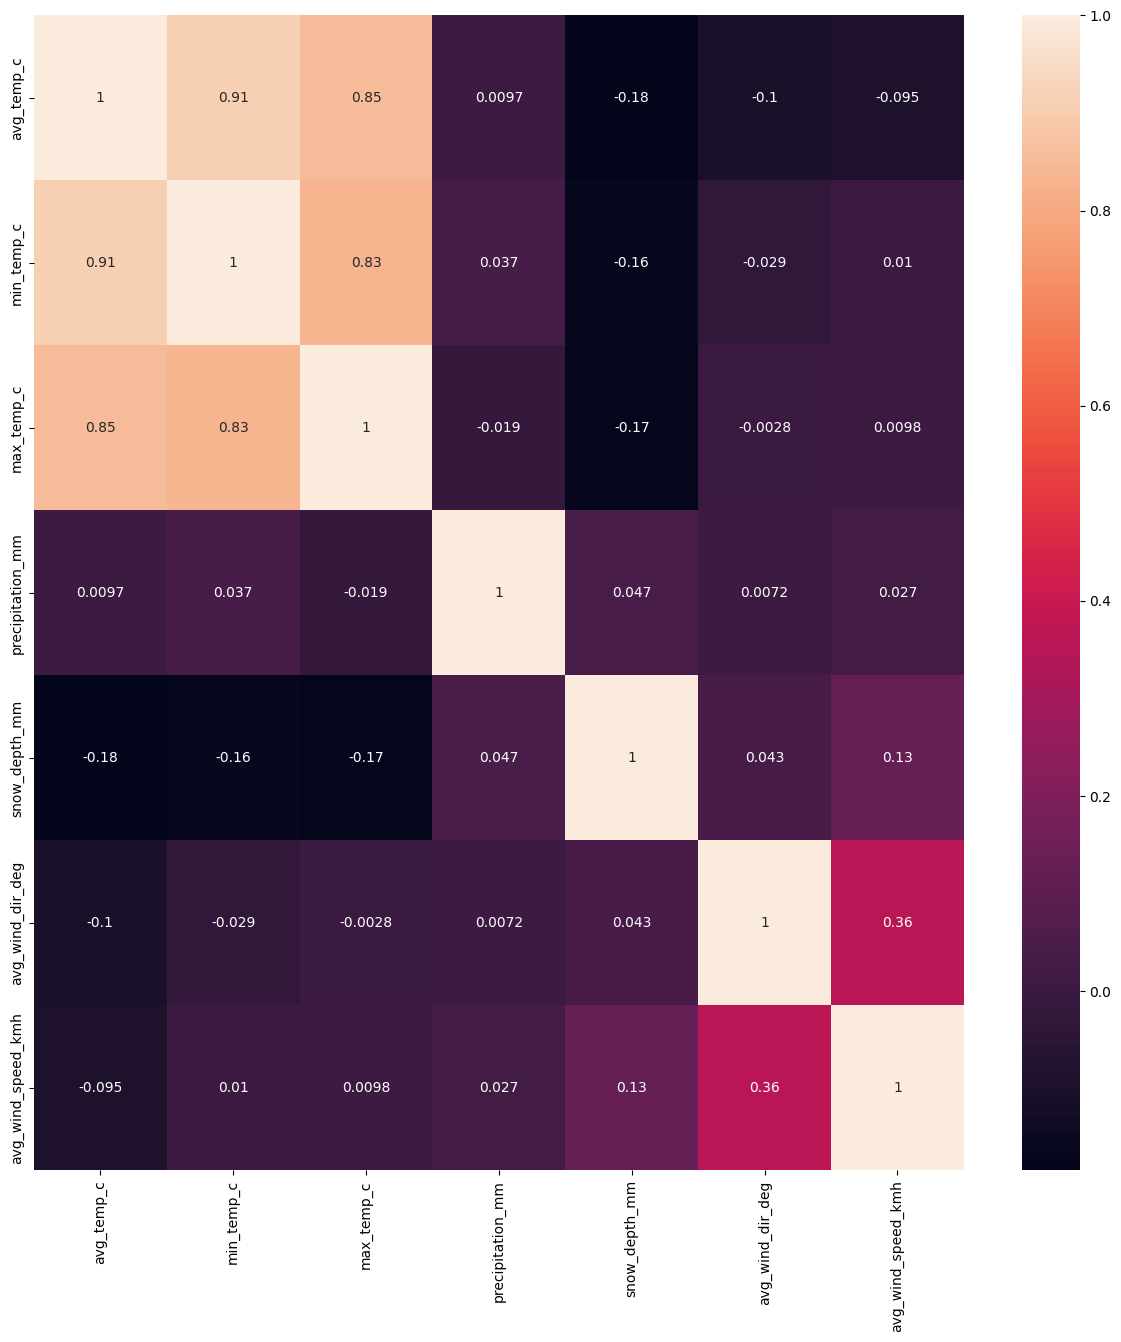

In [15]:
fig = plt.figure(figsize = (15, 15))
ax = fig.gca()
correlations = historical_weather_df[['avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm', 'snow_depth_mm', 'avg_wind_dir_deg', 'avg_wind_speed_kmh']].corr(method = 'pearson')
sns.heatmap(correlations, annot = True, ax = ax)

plt.show()

In [16]:
correlations_df = pd.DataFrame(correlations)
correlations_text_values_df = correlations_df.to_string()
print(correlations_text_values_df)

                    avg_temp_c  min_temp_c  max_temp_c  precipitation_mm  snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh
avg_temp_c            1.000000    0.910517    0.854359          0.009712      -0.183851         -0.102767           -0.095060
min_temp_c            0.910517    1.000000    0.832340          0.037326      -0.163246         -0.029233            0.010098
max_temp_c            0.854359    0.832340    1.000000         -0.019286      -0.171472         -0.002802            0.009789
precipitation_mm      0.009712    0.037326   -0.019286          1.000000       0.047230          0.007249            0.027174
snow_depth_mm        -0.183851   -0.163246   -0.171472          0.047230       1.000000          0.042509            0.126997
avg_wind_dir_deg     -0.102767   -0.029233   -0.002802          0.007249       0.042509          1.000000            0.360684
avg_wind_speed_kmh   -0.095060    0.010098    0.009789          0.027174       0.126997          0.360684            1

In [17]:
del historical_weather_df['precipitation_mm']

In [18]:
encoder = LabelEncoder()

array = historical_weather_df[['city_id']].values
encoder.fit(array)
array_encoded = encoder.transform(array)
historical_weather_df['city_id_encoded'] = array_encoded.shape[0]

historical_weather_df.head(10)

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,city_id_encoded
0,C001,2014-01-01,6.6,-1.4,11.6,0.0,168.0,6.2,182338
1,C001,2014-01-02,9.3,6.3,13.3,0.0,155.0,10.0,182338
2,C001,2014-01-03,7.6,1.9,14.0,0.0,0.0,5.8,182338
3,C001,2014-01-04,7.6,3.9,13.3,0.0,291.0,11.3,182338
4,C001,2014-01-05,8.6,0.5,16.9,0.0,0.0,5.0,182338
5,C001,2014-01-06,9.1,5.7,14.7,0.0,156.0,5.7,182338
6,C001,2014-01-07,8.8,2.0,18.8,0.0,158.0,6.2,182338
7,C001,2014-01-08,8.8,3.0,16.3,0.0,0.0,0.0,182338
8,C001,2014-01-09,9.9,3.9,17.1,0.0,0.0,4.8,182338
9,C001,2014-01-10,10.8,7.0,17.2,0.0,149.0,5.8,182338


In [19]:
scaler = StandardScaler()

date_array = historical_weather_df[['date']]
date_scaled_data = scaler.fit_transform(date_array)
historical_weather_df['date_transform'] = date_scaled_data

avg_temp_c_array = historical_weather_df[['avg_temp_c']]
avg_temp_c_scaled_data = scaler.fit_transform(avg_temp_c_array)
historical_weather_df['avg_temp_c_transform'] = avg_temp_c_scaled_data

min_temp_c_array = historical_weather_df[['min_temp_c']]
min_temp_c_scaled_data = scaler.fit_transform(min_temp_c_array)
historical_weather_df['min_temp_c_transform'] = min_temp_c_scaled_data

max_temp_c_array = historical_weather_df[['max_temp_c']]
max_temp_c_scaled_data = scaler.fit_transform(max_temp_c_array)
historical_weather_df['max_temp_c_transform'] = max_temp_c_scaled_data

snow_depth_mm_array = historical_weather_df[['snow_depth_mm']]
snow_depth_mm_scaled_data = scaler.fit_transform(snow_depth_mm_array)
historical_weather_df['snow_depth_mm_transform'] = snow_depth_mm_scaled_data

avg_wind_dir_deg_array = historical_weather_df[['avg_wind_dir_deg']]
avg_wind_dir_deg_scaled_data = scaler.fit_transform(avg_wind_dir_deg_array)
historical_weather_df['avg_wind_dir_deg_transform'] = avg_wind_dir_deg_scaled_data

avg_wind_speed_kmh_array = historical_weather_df[['avg_wind_speed_kmh']]
avg_wind_speed_kmh_scaled_data = scaler.fit_transform(avg_wind_speed_kmh_array)
historical_weather_df['avg_wind_speed_kmh_transform'] = avg_wind_speed_kmh_scaled_data

historical_weather_df.head(10)

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,city_id_encoded,date_transform,avg_temp_c_transform,min_temp_c_transform,max_temp_c_transform,snow_depth_mm_transform,avg_wind_dir_deg_transform,avg_wind_speed_kmh_transform
0,C001,2014-01-01,6.6,-1.4,11.6,0.0,168.0,6.2,182338,-1.732995,-1.241855,-1.528644,-1.002691,-0.082728,0.225241,-0.540008
1,C001,2014-01-02,9.3,6.3,13.3,0.0,155.0,10.0,182338,-1.731098,-0.971648,-0.771966,-0.851919,-0.082728,0.114518,0.015878
2,C001,2014-01-03,7.6,1.9,14.0,0.0,0.0,5.8,182338,-1.729200,-1.141778,-1.204353,-0.789836,-0.082728,-1.205644,-0.598523
3,C001,2014-01-04,7.6,3.9,13.3,0.0,291.0,11.3,182338,-1.727302,-1.141778,-1.007814,-0.851919,-0.082728,1.272854,0.206050
4,C001,2014-01-05,8.6,0.5,16.9,0.0,0.0,5.0,182338,-1.725405,-1.041702,-1.341931,-0.532637,-0.082728,-1.205644,-0.715552
5,C001,2014-01-06,9.1,5.7,14.7,0.0,156.0,5.7,182338,-1.723507,-0.991663,-0.830928,-0.727754,-0.082728,0.123035,-0.613151
6,C001,2014-01-07,8.8,2.0,18.8,0.0,158.0,6.2,182338,-1.721609,-1.021686,-1.194526,-0.364127,-0.082728,0.140070,-0.540008
7,C001,2014-01-08,8.8,3.0,16.3,0.0,0.0,0.0,182338,-1.719711,-1.021686,-1.096257,-0.585850,-0.082728,-1.205644,-1.446982
8,C001,2014-01-09,9.9,3.9,17.1,0.0,0.0,4.8,182338,-1.717814,-0.911602,-1.007814,-0.514899,-0.082728,-1.205644,-0.744809
9,C001,2014-01-10,10.8,7.0,17.2,0.0,149.0,5.8,182338,-1.715916,-0.821533,-0.703177,-0.506030,-0.082728,0.063415,-0.598523


In [20]:
selected_columns = ['date_transform', 'city_id_encoded','avg_temp_c_transform', 'min_temp_c_transform', 'max_temp_c_transform', 'snow_depth_mm_transform', 'avg_wind_dir_deg_transform', 'avg_wind_speed_kmh_transform']

transformed_historical_weather_df = historical_weather_df[selected_columns]

transformed_historical_weather_df.head(10)

,date_transform,city_id_encoded,avg_temp_c_transform,min_temp_c_transform,max_temp_c_transform,snow_depth_mm_transform,avg_wind_dir_deg_transform,avg_wind_speed_kmh_transform
0,-1.732995,182338,-1.241855,-1.528644,-1.002691,-0.082728,0.225241,-0.540008
1,-1.731098,182338,-0.971648,-0.771966,-0.851919,-0.082728,0.114518,0.015878
2,-1.729200,182338,-1.141778,-1.204353,-0.789836,-0.082728,-1.205644,-0.598523
3,-1.727302,182338,-1.141778,-1.007814,-0.851919,-0.082728,1.272854,0.206050
4,-1.725405,182338,-1.041702,-1.341931,-0.532637,-0.082728,-1.205644,-0.715552
5,-1.723507,182338,-0.991663,-0.830928,-0.727754,-0.082728,0.123035,-0.613151
6,-1.721609,182338,-1.021686,-1.194526,-0.364127,-0.082728,0.140070,-0.540008
7,-1.719711,182338,-1.021686,-1.096257,-0.585850,-0.082728,-1.205644,-1.446982
8,-1.717814,182338,-0.911602,-1.007814,-0.514899,-0.082728,-1.205644,-0.744809
9,-1.715916,182338,-0.821533,-0.703177,-0.506030,-0.082728,0.063415,-0.598523


In [21]:
#dataX = transformed_historical_weather_df[['date_transform', 'city_id_encoded', 'min_temp_c_transform', 'max_temp_c_transform', 'snow_depth_mm_transform', 'avg_wind_dir_deg_transform', 'avg_wind_speed_kmh_transform']].values
#dataY = transformed_historical_weather_df['avg_temp_c_transform'].values


dataX = transformed_historical_weather_df.iloc[0:, [0, 1, 3, 4, 5, 6, 7]].values
dataY = transformed_historical_weather_df.iloc[0:, [2]].values

print(f"dataX:\n{dataX}\n\ndataY:\n{dataY}")

dataX:
[[-1.73299539e+00  1.82338000e+05 -1.52864377e+00 ... -8.27280232e-02
   2.25241339e-01 -5.40008344e-01]
 [-1.73109767e+00  1.82338000e+05 -7.71966306e-01 ... -8.27280232e-02
   1.14518067e-01  1.58784713e-02]
 [-1.72919996e+00  1.82338000e+05 -1.20435343e+00 ... -8.27280232e-02
  -1.20564403e+00 -5.98522745e-01]
 ...
 [ 1.72653886e+00  1.82338000e+05  2.10731696e-01 ... -8.27280232e-02
  -6.86096364e-01  6.30279688e-01]
 [ 1.72843657e+00  1.82338000e+05  4.26925256e-01 ... -8.27280232e-02
  -6.09441791e-01  1.03988050e+00]
 [ 1.73033429e+00  1.82338000e+05  2.89347536e-01 ... -8.27280232e-02
  -3.28375022e-01  3.96222082e-01]]

dataY:
[[-1.24185465]
 [-0.971648  ]
 [-1.14177811]
 ...
 [ 0.33935462]
 [ 0.25929339]
 [ 0.11918624]]


In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY, test_size=0.25)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(136753, 7) (45585, 7) (136753, 1) (45585, 1)


In [23]:
p = 1
d = 0 
q = 0  

arima_model = ARIMA(Y_train, order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(Y_train), end=len(Y_train) + len(X_test) - 1)

arima_mse = mean_squared_error(Y_test, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

Y_test_abs = abs(Y_test)
arima_predictions_abs = abs(arima_predictions)

arima_mae = mean_absolute_error(Y_test, arima_predictions)
arima_rmsle = np.sqrt(mean_squared_log_error(Y_test_abs, arima_predictions_abs))

results_arima = pd.DataFrame({'Model': ['ARIMA'],
                            'RMSE': [np.sqrt(arima_mse)],
                            'RMSLE': [arima_rmsle],
                            'MSE': [arima_mse],
                            'MAE': [arima_mae]}).round(2)

filename = f'/kaggle/working/arima_model_fit.pkl'
with open(filename, 'wb') as file:
    pickle.dump(arima_model_fit, file)

results_arima

,Model,RMSE,RMSLE,MSE,MAE
0,ARIMA,1.0,0.63,1.0,0.82


In [24]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_fit = gb_model.fit(X_train, Y_train)
gb_predictions = gb_model.predict(X_test)

gb_mse = mean_squared_error(Y_test, gb_predictions)
gb_mae = mean_absolute_error(Y_test, gb_predictions)

Y_test_abs = abs(Y_test)
gb_predictions_abs = abs(gb_predictions)

gb_rmsle = np.sqrt(mean_squared_log_error(Y_test_abs, gb_predictions_abs))

results_gb = pd.DataFrame({'Model': ['Gradient Boosting'],
                            'RMSE': [np.sqrt(gb_mse)],
                            'RMSLE': [gb_rmsle],
                            'MSE': [gb_mse],
                            'MAE': [gb_mae]}).round(2)

filename = f'/kaggle/working/gb_model_fit.pkl'
with open(filename, 'wb') as file:
    pickle.dump(gb_model_fit, file)

results_gb

,Model,RMSE,RMSLE,MSE,MAE
0,Gradient Boosting,0.19,0.1,0.03,0.1


In [25]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_fit = rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_mae = mean_absolute_error(Y_test, rf_predictions)

Y_test_abs = abs(Y_test)
rf_predictions_abs = abs(rf_predictions)

rf_rmsle = np.sqrt(mean_squared_log_error(Y_test_abs, rf_predictions_abs))

results_rf = pd.DataFrame({'Model': ['Random Forest'],
                            'RMSE': [np.sqrt(rf_mse)],
                            'RMSLE': [rf_rmsle],
                            'MSE': [rf_mse],
                            'MAE': [rf_mae]}).round(2)

filename = f'/kaggle/working/rf_model_fit.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_model_fit, file)

results_rf

,Model,RMSE,RMSLE,MSE,MAE
0,Random Forest,0.18,0.08,0.03,0.09


In [26]:
lr_model = LinearRegression()
lr_model_fit = lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_test)

lr_mse = mean_squared_error(Y_test, lr_predictions)
lr_mae = mean_absolute_error(Y_test, lr_predictions)

Y_test_abs = abs(Y_test)
lr_predictions_abs = abs(lr_predictions)

lr_rmsle = np.sqrt(mean_squared_log_error(Y_test_abs, lr_predictions_abs))

results_lr = pd.DataFrame({'Model': ['Linear Regression'],
                            'RMSE': [np.sqrt(lr_mse)],                            
                            'RMSLE': [lr_rmsle],
                            'MSE': [lr_mse],
                            'MAE': [lr_mae]}).round(2)

filename = f'/kaggle/working/lr_model_fit.pkl'
with open(filename, 'wb') as file:
    pickle.dump(lr_model_fit, file)

results_lr

,Model,RMSE,RMSLE,MSE,MAE
0,Linear Regression,0.35,0.14,0.12,0.19


In [27]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model_fit = lstm_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

loss = lstm_model.evaluate(X_test, Y_test)
lstm_predictions = lstm_model.predict(X_test)

lstm_mse = mean_squared_error(Y_test, lstm_predictions)
lstm_mae = mean_absolute_error(Y_test, lstm_predictions)

Y_test_abs = abs(Y_test)
lstm_predictions_abs = abs(lstm_predictions)
lstm_rmsle = np.sqrt(mean_squared_log_error(Y_test_abs, lstm_predictions_abs))

results_lstm = pd.DataFrame({'Model': ['LSTM'],
                             'RMSE': [np.sqrt(lstm_mse)],
                             'RMSLE': [lstm_rmsle],
                             'MSE': [lstm_mse],
                             'MAE': [lstm_mae]}).round(2)

lstm_model.save('/kaggle/working/lstm_model_fit.h5')

results_lstm

Epoch 1/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.1474 - val_loss: 0.0459
Epoch 2/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0485 - val_loss: 0.0404
Epoch 3/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0449 - val_loss: 0.0423
Epoch 4/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - loss: 0.0442 - val_loss: 0.0475
Epoch 5/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0443 - val_loss: 0.0426
Epoch 6/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0428 - val_loss: 0.0374
Epoch 7/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0412 - val_loss: 0.0395
Epoch 8/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0400 - val_loss: 0.0394
Epoch 9/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.0413 - val_loss: 0.0355
Epoch 10/10
4274/4274 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0396 - val_loss: 0.0380
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0384
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


,Model,RMSE,RMSLE,MSE,MAE
0,LSTM,0.19,0.1,0.04,0.1


In [28]:
results_dfs_list = [results_lr, results_rf, results_gb, results_arima, results_lstm]

In [29]:
selected_columns = ['Model', 'RMSE','RMSLE', 'MSE', 'MAE']
results_df = pd.concat([df[selected_columns] for df in results_dfs_list], ignore_index=True)
results_df = results_df.sort_values(by='RMSE', ascending=True)
results_df = results_df.reset_index(drop=True)

results_df

,Model,RMSE,RMSLE,MSE,MAE
0,Random Forest,0.18,0.08,0.03,0.09
1,Gradient Boosting,0.19,0.10,0.03,0.10
2,LSTM,0.19,0.10,0.04,0.10
3,Linear Regression,0.35,0.14,0.12,0.19
4,ARIMA,1.00,0.63,1.00,0.82


In [30]:
#model_list_df = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting','ARIMA', 'SARIMA', 'LSTM'],
                              #'Model_fit': ['lr_model_fit', 'rf_model_fit', 'gb_model_fit', 'arima_model_fit', 'sarima_model_fit', 'lstm_model_fit']})

In [31]:
#lowest_rmse_model = results_df.loc[results_df['RMSE'] == results_df['RMSE'].min(), 'Model'].iloc[0]

#model_to_save_name = model_list_df.loc[model_list_df['Model'] == lowest_rmse_model, 'Model_fit'].iloc[0]

#model_to_save = globals()[model_to_save_name]

#filename = f'{model_to_save_name}.pkl'
#pickle.dump(model_to_save, open(filename, 'wb'))

In [32]:
submission_key_df['avg_temp_c'] = 0
submission_key_df['avg_temp_c'] = historical_weather_df['avg_temp_c'].mean()

del submission_key_df['submission_ID']

submission_key_df.head(10)

,city_id,date,avg_temp_c
0,C001,2019-01-01,19.009049
1,C001,2019-01-02,19.009049
2,C001,2019-01-03,19.009049
3,C001,2019-01-04,19.009049
4,C001,2019-01-05,19.009049
5,C001,2019-01-06,19.009049
6,C001,2019-01-07,19.009049
7,C002,2019-01-01,19.009049
8,C002,2019-01-02,19.009049
9,C002,2019-01-03,19.009049


In [33]:
submission_key_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city_id     700 non-null    object 
 1   date        700 non-null    object 
 2   avg_temp_c  700 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.5+ KB


In [34]:
prediction_data_df = submission_key_df

encoder =  LabelEncoder()

city_id_array = prediction_data_df[['city_id']].values
encoder.fit(city_id_array)
city_id_array_encoded = encoder.transform(city_id_array)
prediction_data_df['city_id_encoded'] = city_id_array_encoded.shape[0]
del prediction_data_df['city_id']

scaler = StandardScaler()

prediction_data_df['date'] = pd.to_datetime(prediction_data_df['date'])
date_array = prediction_data_df[['date']]
date_scaled_data = scaler.fit_transform(date_array)
prediction_data_df['date_transform'] = date_scaled_data
del prediction_data_df['date']

avg_temp_c_array = prediction_data_df[['avg_temp_c']]
avg_temp_c_scaled_data = scaler.fit_transform(avg_temp_c_array)
prediction_data_df['avg_temp_c_transform'] = avg_temp_c_scaled_data
del prediction_data_df['avg_temp_c']

prediction_data_df.head(10)

,city_id_encoded,date_transform,avg_temp_c_transform
0,700,-1.5,-3.552714e-15
1,700,-1.0,-3.552714e-15
2,700,-0.5,-3.552714e-15
3,700,0.0,-3.552714e-15
4,700,0.5,-3.552714e-15
5,700,1.0,-3.552714e-15
6,700,1.5,-3.552714e-15
7,700,-1.5,-3.552714e-15
8,700,-1.0,-3.552714e-15
9,700,-0.5,-3.552714e-15


In [35]:
#prediction_data = prediction_data_df
 #start = 0, end = len(prediction_data) - 1
    
#if(model_to_save_name=='arima_model_fit'):
    #predictions = model.predict(start=start, end=end)
#elif(model_to_save_name in ['lr_model_fit', 'rf_model_fit', 'gb_model_fit', 'sarima_model_fit', 'lstm_model_fit']):
    #predictions = model.predict(prediction_data)

In [36]:
results_df

,Model,RMSE,RMSLE,MSE,MAE
0,Random Forest,0.18,0.08,0.03,0.09
1,Gradient Boosting,0.19,0.10,0.03,0.10
2,LSTM,0.19,0.10,0.04,0.10
3,Linear Regression,0.35,0.14,0.12,0.19
4,ARIMA,1.00,0.63,1.00,0.82


In [37]:
prediction_data_df.drop(columns=['avg_temp_c_transform'], inplace=True)
prediction_data_df.head(10)

,city_id_encoded,date_transform
0,700,-1.5
1,700,-1.0
2,700,-0.5
3,700,0.0
4,700,0.5
5,700,1.0
6,700,1.5
7,700,-1.5
8,700,-1.0
9,700,-0.5


In [38]:
prediction_data = prediction_data_df

lstm_model = load_model('/kaggle/working/lstm_model_fit.h5')

predictions = lstm_model.predict(prediction_data)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [39]:
#prediction_data = prediction_data_df

#predictions = lstm_model_fit.predict(prediction_data)

In [40]:
predictions

array([[-0.38335654],
       [-0.9634363 ],
       [-1.3559409 ],
       [-1.5325981 ],
       [-1.5490704 ],
       [-1.4757063 ],
       [-1.3850255 ],
       [-0.38335654],
       [-0.9634363 ],
       [-1.3559409 ],
       [-1.5325981 ],
       [-1.5490704 ],
       [-1.4757063 ],
       [-1.3850255 ],
       [-0.38335654],
       [-0.9634363 ],
       [-1.3559409 ],
       [-1.5325981 ],
       [-1.5490704 ],
       [-1.4757063 ],
       [-1.3850255 ],
       [-0.38335654],
       [-0.9634363 ],
       [-1.3559409 ],
       [-1.5325981 ],
       [-1.5490704 ],
       [-1.4757063 ],
       [-1.3850255 ],
       [-0.38335654],
       [-0.9634363 ],
       [-1.3559409 ],
       [-1.5325981 ],
       [-1.5490704 ],
       [-1.4757063 ],
       [-1.3850255 ],
       [-0.38335654],
       [-0.9634363 ],
       [-1.3559409 ],
       [-1.5325981 ],
       [-1.5490704 ],
       [-1.4757063 ],
       [-1.3850255 ],
       [-0.38335654],
       [-0.9634363 ],
       [-1.3559409 ],
       [-1

In [41]:
predictions.shape

(700, 1)

In [42]:
original_data = scaler.inverse_transform(predictions)
original_data

array([[18.625692],
       [18.045612],
       [17.653109],
       [17.476452],
       [17.459978],
       [17.533342],
       [17.624023],
       [18.625692],
       [18.045612],
       [17.653109],
       [17.476452],
       [17.459978],
       [17.533342],
       [17.624023],
       [18.625692],
       [18.045612],
       [17.653109],
       [17.476452],
       [17.459978],
       [17.533342],
       [17.624023],
       [18.625692],
       [18.045612],
       [17.653109],
       [17.476452],
       [17.459978],
       [17.533342],
       [17.624023],
       [18.625692],
       [18.045612],
       [17.653109],
       [17.476452],
       [17.459978],
       [17.533342],
       [17.624023],
       [18.625692],
       [18.045612],
       [17.653109],
       [17.476452],
       [17.459978],
       [17.533342],
       [17.624023],
       [18.625692],
       [18.045612],
       [17.653109],
       [17.476452],
       [17.459978],
       [17.533342],
       [17.624023],
       [18.625692],


In [43]:
prediction_data_df.head()

,city_id_encoded,date_transform
0,700,-1.5
1,700,-1.0
2,700,-0.5
3,700,0.0
4,700,0.5


In [44]:
prediction_data_df.head(10)

,city_id_encoded,date_transform
0,700,-1.5
1,700,-1.0
2,700,-0.5
3,700,0.0
4,700,0.5
5,700,1.0
6,700,1.5
7,700,-1.5
8,700,-1.0
9,700,-0.5


In [45]:
#avg_temp_c_array = prediction_data_df['avg_temp_c_transform'].values.reshape(-1, 1)  # Reshape if needed


#scaler = StandardScaler()

#avg_temp_c_scaled_data = scaler.fit_transform(avg_temp_c_array)
#prediction_data_df['avg_temp_c_transform'] = avg_temp_c_scaled_data
#avg_temp_c_original = scaler.inverse_transform(prediction_data_df['avg_temp_c_transform'].values.reshape(-1, 1))
#prediction_data_df['avg_temp_c_original'] = avg_temp_c_original

#date_scaled_data = scaler.fit_transform(date_array)
#prediction_data_df['date_transform'] = date_scaled_data
#date_original = scaler.inverse_transform(prediction_data_df['date_transform'].values.reshape(-1, 1))
#prediction_data_df['date_original'] = date_original
#prediction_data_df['date_original'] = pd.to_datetime(prediction_data_df['date_original'])

#encoded_data = prediction_data_df[['city_id_encoded']]
#decoded_city_id_array = encoder.inverse_transform(encoded_data)
#prediction_data_df['city_id_decoded'] = decoded_city_id_array

#prediction_data_df.head(10)

In [46]:
#prediction_data_df.describe()

In [47]:
sample_submission_df.head(10)

,submission_ID,avg_temp_c
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
5,6,NaN
6,7,NaN
7,8,NaN
8,9,NaN
9,10,NaN


In [48]:
sample_submission_df['avg_temp_c'] = pd.DataFrame(original_data)

In [49]:
sample_submission_df.head(10)

,submission_ID,avg_temp_c
0,1,18.625692
1,2,18.045612
2,3,17.653109
3,4,17.476452
4,5,17.459978
5,6,17.533342
6,7,17.624023
7,8,18.625692
8,9,18.045612
9,10,17.653109


In [50]:
sample_submission_df.to_csv('P245.csv', index=False)